# IMPORTING THE LIBRARIES AND LOADING THE DATASET

In [1]:
# IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING THE DATASET

df=pd.read_csv("zomato_data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# EXPLORATARY DATA ANALYSIS

In [3]:
# CONVERTING THE DATATYPE OF 'rate' COLUMN

def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
#INTO OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# GAINING INSIGHTS FROM DATA BY SOLVING SOME PROBLEM STATEMENT (DATA VISUALIZATION)

### => *WHAT TYPE OF RESTAURANT DO THE MAJORITY OF CUSTOMERS ORDER FROM ?*

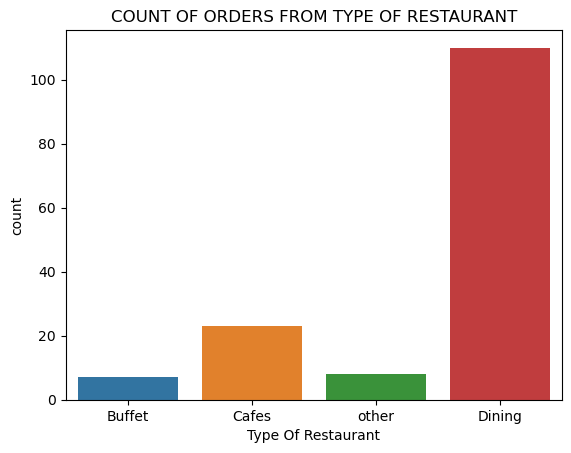

In [5]:
# CREATING A COUNTPLOT FOR THE 'listed_in(type)' COLUMN

sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type Of Restaurant")
plt.title("COUNT OF ORDERS FROM TYPE OF RESTAURANT")
plt.show()

#### *CONCLUSION - Majority of the Restaurant falls in the DINING category*

### => *NUMBER OF VOTES EACH TYPE OF RESTAURANT RECEIVED FROM CUSTOMERS*

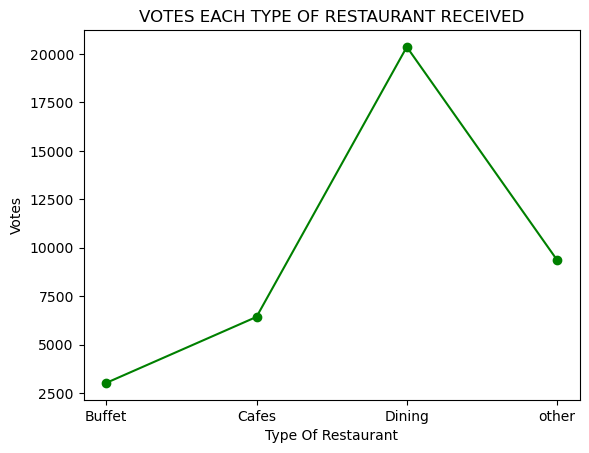

In [6]:
# CREATING A LINE GRAPH USING 'listed_in(type)' AND 'votes' COLUMN

grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type Of Restaurant")
plt.ylabel("Votes")
plt.title("VOTES EACH TYPE OF RESTAURANT RECEIVED")
plt.show()

#### *CONCLUSION - DINING Restaurant received maximum number of votes*

### => *WHAT ARE OF RATINGS THAT MAJORITY OF RESTAURANT HAVE RECEIVED*

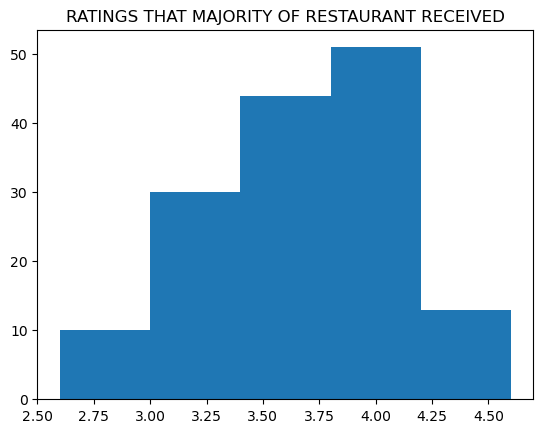

In [7]:
# CREATING THE HISTOGRAM USING THE 'rate' COLUMN

plt.hist(df['rate'],bins=5)
plt.title("RATINGS THAT MAJORITY OF RESTAURANT RECEIVED")
plt.show()

#### *CONCLUSION - Majority Restaurant received ratings from 3.5 to 4.0*

### => *WHAT ARE THE AVERAGE SPENDING ON ORDERS PLACED BY THE COUPLES*

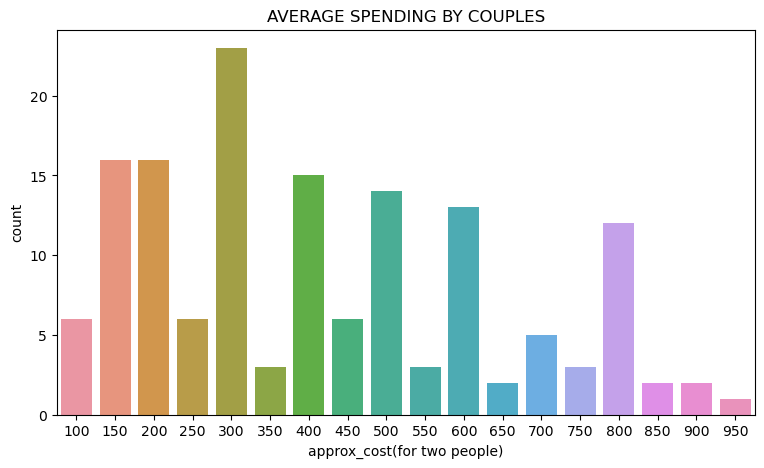

In [8]:
# CREATING THE COUNTPLOT USING 'approx_cost(for two people)' COLUMN

plt.figure(figsize=(9,5))
sns.countplot(x=df['approx_cost(for two people)'])
plt.title("AVERAGE SPENDING BY COUPLES")
plt.show()

#### *CONCLUSION - The average spending on the orders placed by the couples is approximate 300 rupees*

### => *WHICH MODE (ONLINE OR OFFLINE) RECEIVED THE MAXIMUM RATING*

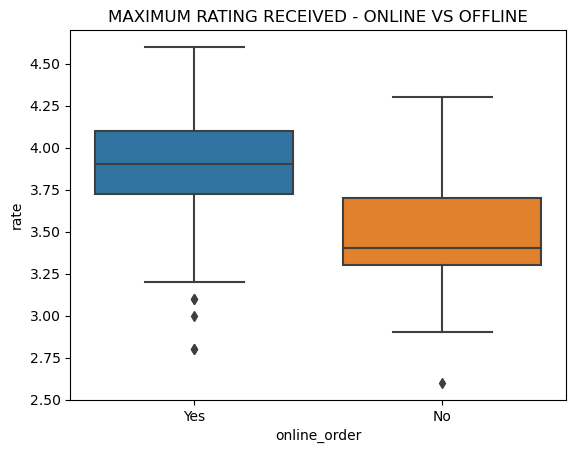

In [9]:
# CREATING A BOXPLOT USING 'online_order' AND 'rate' COLUMN

sns.boxplot(x='online_order',y='rate',data=df)
plt.title("MAXIMUM RATING RECEIVED - ONLINE VS OFFLINE")
plt.show()

#### *CONCLUSION - OFFLINE ORDER received lower rating in comparison to ONLINE ORDER*

### => *WHICH TYPE OF RESTAURANT RECEIVED MORE OFFLINE ORDERS , SO THAT ZOMATO CAN PROVIDE CUSTOMERS WITH SOME GOOD OFFERS*

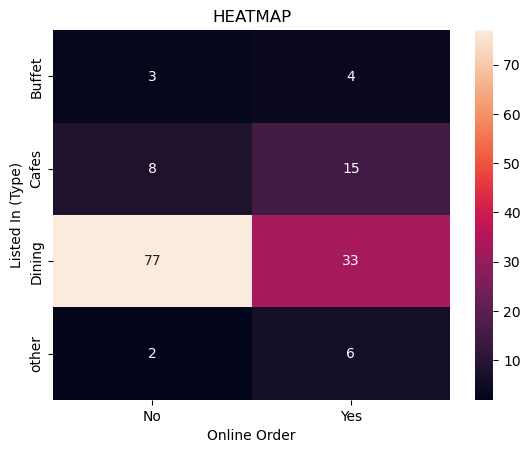

In [10]:
# CREATING A HEATMAP USING 'listed_in(type)' AND 'online_order' COLUMN

pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True)
plt.title("HEATMAP")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#### *CONCLUSION - DINING RESTAURANT primarily accept offline orders , whereas CAFES primarily receive online orders . This suggests that clients prefers orders in  person at RESTAURANTS , but prefer online ordering at CAFES* 